# install gy-redis

In [ ]:
!pip install -U gy-redis

In [2]:
import redis
from gy_redis import (
    RedisImageHandler, 
    RedisDictHandler,
    RedisBytesHandler,
)

# redis from redis-py
https://github.com/redis/redis-py

In [3]:
redis_client = redis.Redis(
    host='localhost', 
    port=51201
)
redis_client.keys()

[b'camere', b'test-img', b'test-dict', b'face-meta']

# RedisImageHandler

In [4]:
# If matplotlib cannot be found, you can use pip install
# !pip install matplotlib

In [5]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

In [5]:
req = requests.get('https://images.freeimages.com/images/large-previews/064/cat-1537181.jpg')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

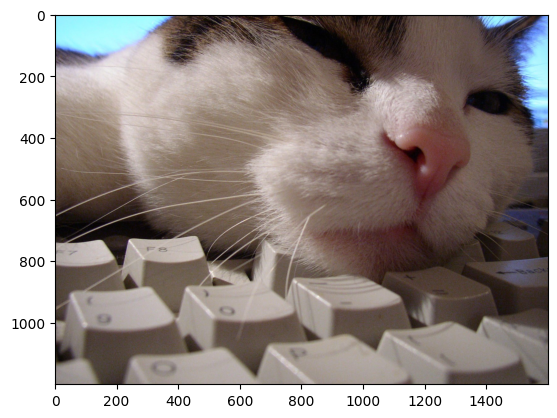

In [6]:
plt.imshow(img[:,:,::-1])

## write img to redis

In [7]:
# img to redis topic : 'test-img'
img_handler = RedisImageHandler(redis_client, 'test-img')

In [8]:
# set img
img_handler.set(img)

In [9]:
# so we got new key (if no-exist before)
redis_client.keys()

[b'test-dict', b'face-meta', b'test-img', b'camere']

## read img from redis

In [11]:
img_from_redis = img_handler.get()

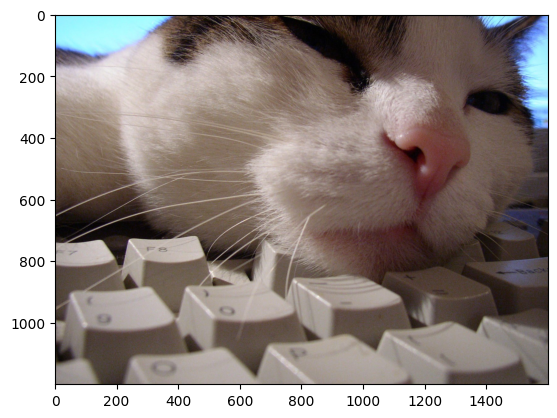

In [13]:
plt.imshow(img[:,:,::-1])

What is the performance？ (in local redis)

for write

In [14]:
%%timeit
img_handler.set(img)

37.2 ms ± 6.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


for read

In [15]:
%%timeit
img_handler.get()

22.7 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# RedisDictHandler

In [16]:
# dict to redis topic : 'test-dict'
dict_handler = RedisDictHandler(redis_client, 'test-dict')

 write

In [17]:
dict_handler.set({
    "object" : [{
        'xyxy': [1,23,45,6],
        'label': 'person'
    }],
    'is_black': True,
    'companys': [
        {
            'id': 1,
            'departments': [
                {
                    'id': 1,
                    'name': 'RD'
                },
                {
                    'id': 2,
                    'name': 'HR'
                },
            ]
        }
    ]
})

get

In [18]:
dict_handler.get()

{'object': [{'xyxy': [1, 23, 45, 6], 'label': 'person'}],
 'is_black': True,
 'companys': [{'id': 1,
   'departments': [{'id': 1, 'name': 'RD'}, {'id': 2, 'name': 'HR'}]}]}

# subscribe / publish

In [6]:
# dict to redis topic : 'test-dict'
streaming_handler = RedisDictHandler(redis_client, 'test-streaming')

In [7]:
def handleData(data):
    print(f"received data : {data}")

In [8]:
"""
run_in_thread determines whether to run in the background. 
If the value is False, the main program will be in a listening state (hang on).
"""

streaming_handler.subscribe(callback_function=handleData, run_in_thread=True)

In [9]:
# publish

streaming_handler.publish({"x":1,"y":2})

received data : {'x': 1, 'y': 2}
